In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('customer_raw_data_1500.csv')

In [3]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
0,CUST1000,68,Unknown,new york,"$93,792",2022-02-16,79.0
1,CUST1001,43,MALE,Los Angeles,"$138,681",23/09/2022,74.0
2,CUST1002,73,MALE,Huston,"$30,858",30/07/2022,32.0
3,CUST1003,25,FEMALE,new york,"$138,103",2022-05-02,36.0
4,CUST1004,72,FeMale,Unknown,"$103,229",2022-08-30,83.0


In [4]:
data.shape

(1500, 7)

### Duplicates are removed

In [5]:
duplicated_rows = data.duplicated().sum()
duplicated_rows

np.int64(0)

In [6]:
duplicated_columns = data.columns.duplicated().sum()
duplicated_columns

np.int64(0)

### Identify and handle missing values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_ID     1500 non-null   object 
 1   Age             1500 non-null   int64  
 2   Gender          1500 non-null   object 
 3   City            1500 non-null   object 
 4   Income          1370 non-null   object 
 5   Customer_Since  1500 non-null   object 
 6   Spending_Score  1482 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 82.2+ KB


In [8]:
data.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
City                0
Income            130
Customer_Since      0
Spending_Score     18
dtype: int64

#### If a column has few missing values we can impute (fill) them 
#### Mean or median (for numerical values)

#### If a column has too many missing values, we may consider dropping it.

### Fix inconsistent data formats

In [9]:
data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',','')

In [10]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
0,CUST1000,68,Unknown,new york,93792,2022-02-16,79.0
1,CUST1001,43,MALE,Los Angeles,138681,23/09/2022,74.0
2,CUST1002,73,MALE,Huston,30858,30/07/2022,32.0
3,CUST1003,25,FEMALE,new york,138103,2022-05-02,36.0
4,CUST1004,72,FeMale,Unknown,103229,2022-08-30,83.0


In [11]:
data['Income'] = pd.to_numeric(data['Income'])

In [12]:
data['Income'] = data['Income'].fillna(data['Income'].median())
data['Spending_Score'] = data['Spending_Score'].fillna(data['Spending_Score'].median())

In [13]:
data.isnull().sum()

Customer_ID       0
Age               0
Gender            0
City              0
Income            0
Customer_Since    0
Spending_Score    0
dtype: int64

In [14]:
data['Customer_Since'] = pd.to_datetime(data['Customer_Since'], format = 'mixed')

### Handle categorical data

In [15]:
data['Gender'] = data['Gender'].str.title()

In [16]:
data['City'] = data['City'].str.title()

In [17]:
data['City'] = data['City'].replace('Huston', 'Houston')

In [18]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score
0,CUST1000,68,Unknown,New York,93792.0,2022-02-16,79.0
1,CUST1001,43,Male,Los Angeles,138681.0,2022-09-23,74.0
2,CUST1002,73,Male,Houston,30858.0,2022-07-30,32.0
3,CUST1003,25,Female,New York,138103.0,2022-05-02,36.0
4,CUST1004,72,Female,Unknown,103229.0,2022-08-30,83.0


In [19]:
data.describe()


,Age,Income,Customer_Since,Spending_Score
count,1500.000000,1500.000000,1500,1500.000000
mean,53.431333,85030.256000,2022-12-26 05:58:04.800000256,49.821333
min,-5.000000,20046.000000,2022-01-03 00:00:00,1.000000
25%,34.000000,55504.000000,2022-06-24 18:00:00,24.000000
50%,53.000000,84013.000000,2022-12-15 12:00:00,48.000000
75%,72.000000,115335.000000,2023-06-26 00:00:00,75.000000
max,150.000000,149942.000000,2023-12-31 00:00:00,100.000000
std,25.251846,36440.499374,NaN,29.107265


In [20]:
data.info

<bound method DataFrame.info of      Customer_ID  Age   Gender         City    Income Customer_Since  \
0       CUST1000   68  Unknown     New York   93792.0     2022-02-16   
1       CUST1001   43     Male  Los Angeles  138681.0     2022-09-23   
2       CUST1002   73     Male      Houston   30858.0     2022-07-30   
3       CUST1003   25   Female     New York  138103.0     2022-05-02   
4       CUST1004   72   Female      Unknown  103229.0     2022-08-30   
...          ...  ...      ...          ...       ...            ...   
1495    CUST2495   78   Female     New York   42001.0     2023-01-25   
1496    CUST2496   33   Female      Houston   63038.0     2023-12-29   
1497    CUST2497   45    Other      Houston   75659.0     2022-09-23   
1498    CUST2498   84     Male      Unknown   66664.0     2023-09-03   
1499    CUST2499   -5     Male      Houston   56435.0     2023-05-01   

      Spending_Score  
0               79.0  
1               74.0  
2               32.0  
3          

In [21]:
data = data[data['Age'] >= 0]

In [22]:
data.describe()


,Age,Income,Customer_Since,Spending_Score
count,1476.000000,1476.000000,1476,1476.000000
mean,54.381436,84988.474255,2022-12-26 19:13:10.243902464,49.699864
min,16.000000,20046.000000,2022-01-03 00:00:00,1.000000
25%,35.000000,55542.500000,2022-06-26 00:00:00,24.000000
50%,53.000000,84013.000000,2022-12-16 12:00:00,48.000000
75%,72.000000,115237.000000,2023-06-26 00:00:00,75.000000
max,150.000000,149942.000000,2023-12-31 00:00:00,100.000000
std,24.322303,36416.988370,NaN,29.183000


In [23]:
data = data[data['City'].str.lower() != 'unknown']

### Summarize the dataset

### Mean, median, and mode of age 

In [24]:
print("Summary Statistics:\n")

# Age
print(f"Age:\n Mean: {data['Age'].mean():.2f}")
print(f" Median: {data['Age'].median():.2f}")
print(f" Mode: {data['Age'].mode()[0]:.2f}")

Summary Statistics:

Age:
 Mean: 53.89
 Median: 53.00
 Mode: 25.00


### Mean, median, and mode of age and income

In [25]:
# Income
print(f"\nIncome:\n Mean: {data['Income'].mean():.2f}")
print(f" Median: {data['Income'].median():.2f}")
print(f" Mode: {data['Income'].mode()[0]:.2f}")



Income:
 Mean: 83877.34
 Median: 84013.00
 Mode: 84013.00


### Distribution of customers by city and gender

In [26]:
city_distribution = data['City'].value_counts()
gender_distribution = data['Gender'].value_counts()
print("\nCity distribution:\n", city_distribution)
print("\nGender distribution:\n", gender_distribution)


City distribution:
 City
Los Angeles    442
New York       421
Houston        416
Name: count, dtype: int64

Gender distribution:
 Gender
Female     527
Male       375
Other      191
Unknown    186
Name: count, dtype: int64


###  Age groups vs Income

In [27]:
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 20, 40, 60, 100], labels=['0-20','21-40','41-60','60+'])
age_income_group = data.groupby('Age_Group', observed=False)['Income'].mean()
print("\nAverage Income by Age Group:\n", age_income_group)



Average Income by Age Group:
 Age_Group
0-20     85430.012987
21-40    84412.305949
41-60    81333.666667
60+      85134.384306
Name: Income, dtype: float64


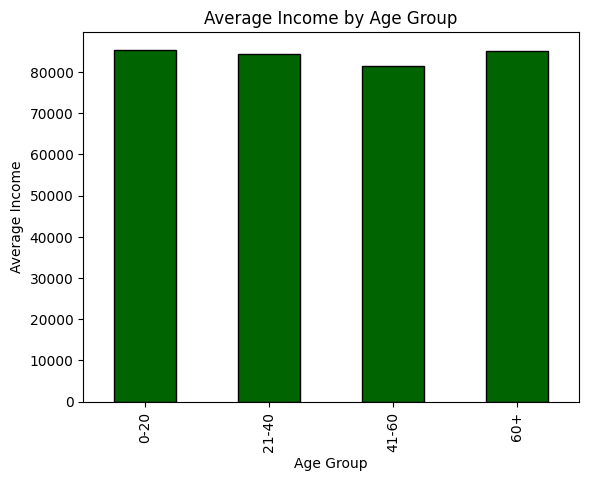

In [28]:
age_income_group.plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.show()

In [29]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score,Age_Group
0,CUST1000,68,Unknown,New York,93792.0,2022-02-16,79.0,60+
1,CUST1001,43,Male,Los Angeles,138681.0,2022-09-23,74.0,41-60
2,CUST1002,73,Male,Houston,30858.0,2022-07-30,32.0,60+
3,CUST1003,25,Female,New York,138103.0,2022-05-02,36.0,21-40
5,CUST1005,83,Female,New York,84013.0,2022-12-22,35.0,60+


### Gender vs average income

In [30]:
gender_income = data.groupby('Gender')['Income'].mean()
print("\nAverage Income by Gender:\n", gender_income)


Average Income by Gender:
 Gender
Female     83593.423150
Male       84230.461333
Other      85086.068063
Unknown    82728.639785
Name: Income, dtype: float64


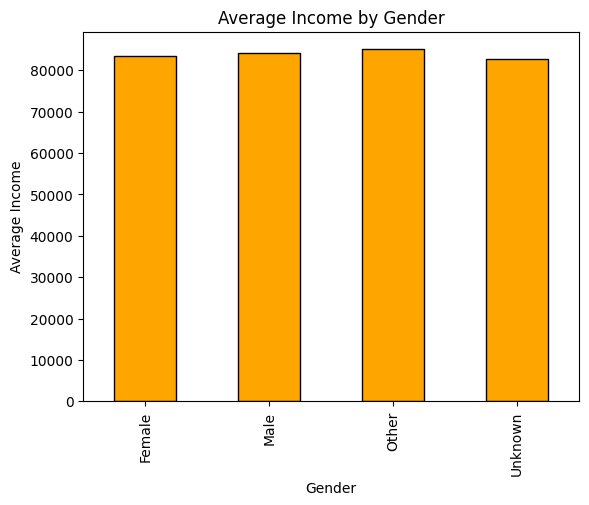

In [31]:
gender_income.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Income')
plt.show()

### --Some rows had missing dates 
### --had "Unknown" cities and invalid ages
### --Dates were in multiple formats 
